In [1]:
import pandas as pd
papers = pd.read_csv('book2.csv',encoding='ISO-8859-1')

In [2]:
papers.head()

,ID,Date,Aquirer,Aquired,Heading,Text
0,1,05-Mar-19,Amazon,Harvard hospital,Amazon uses AI to take care of Harvard hospita...,AMAZON has moved to strengthen its ties with A...
1,2,9 January 2019,AppFolio,Dynasty Marketplace,AppFolio Acquires Advanced Artificial Intellig...,"AppFolio, Inc. (NASDAQ: APPF), a leading provi..."
2,3,08-Feb-19,avalara,Indix,Avalara buys AI startup Indix,Tax automation solutions provider Avalara has ...
3,4,05-Jun-18,Black Knight,HeavyWater,Black Knight seeks AI might with HeavyWater deal,"Black Knight has acquired HeavyWater, a develo..."
4,5,27-Feb-19,blackberry,Cylance,BlackBerry buys AI cybersecurity firm Cylance ...,BlackBerry has completed its $1.4 billion acqu...


In [3]:
# Remove the columns
papers = papers.drop(columns=['Date','Aquirer','Aquired','Heading'], axis=1)
# sample only 10 papers - for demonstration purposes
papers = papers.sample(25)
# Print out the first rows of papers
papers.head()

,ID,Text
11,12,US-based technology company Cisco (NASDAQ: CSC...
19,20,S&P Global Inc. said it would buy technology s...
21,22,"Seven Stars Cloud Group, Inc. (to be renamed I..."
1,2,"AppFolio, Inc. (NASDAQ: APPF), a leading provi..."
13,14,"FRONTEO USA, Inc. (""FRONTEO USA""), awholly-own..."


In [4]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = papers['Text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = papers['Text'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

11    us-based technology company cisco (nasdaq: csc...
19    s&p global inc. said it would buy technology s...
21    seven stars cloud group, inc. (to be renamed i...
1     appfolio, inc. (nasdaq: appf), a leading provi...
13    fronteo usa, inc. ("fronteo usa"), awholly-own...
Name: paper_text_processed, dtype: object

In [5]:
%%time
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:2])

[['us', 'based', 'technology', 'company', 'cisco', 'nasdaq', 'csco', 'has', 'completed', 'theacquisition', 'ofus', 'based', 'artificial', 'intelligence', 'firm', 'mindmeld', 'inc', 'the', 'company', 'said', 'cisco', 'acquired', 'mindmeld', 'for', 'usd', 'in', 'cash', 'and', 'assumed', 'equity', 'awards', 'mindmeld', 'has', 'developed', 'an', 'ai', 'platform', 'that', 'enables', 'customers', 'to', 'build', 'intelligent', 'and', 'human', 'interfaces', 'for', 'any', 'application', 'or', 'device', 'through', 'its', 'proprietary', 'machine', 'learning', 'technology', 'mindmeld', 'delivers', 'high', 'levels', 'of', 'accuracy', 'to', 'help', 'usersinteract', 'with', 'voice', 'and', 'chat', 'assistants', 'in', 'more', 'natural', 'way', 'cisco', 'said', 'that', 'as', 'chat', 'and', 'voice', 'quickly', 'become', 'the', 'interfaces', 'of', 'choice', 'mindmeld', 'ai', 'technology', 'willenable', 'it', 'to', 'deliver', 'unique', 'experiences', 'throughout', 'its', 'portfolio', 'starting', 'with', '

In [6]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [7]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','to','be','of','in'])

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [8]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [9]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:5])

[['base', 'technology', 'company', 'complete', 'theacquisition', 'ofu', 'base', 'firm', 'company', 'say', 'acquire', 'usd', 'cash', 'assume', 'equity', 'award', 'mindmeld', 'develop', 'platform', 'enable', 'customer', 'build', 'intelligent', 'human', 'interface', 'application', 'device', 'proprietary', 'technology', 'mindmeld', 'deliver', 'high', 'level', 'accuracy', 'help', 'usersinteract', 'voice', 'chat', 'assistant', 'natural', 'say', 'voice', 'quickly', 'become', 'interface', 'choice', 'technology', 'willenable', 'deliver', 'unique', 'experience', 'portfolio', 'start', 'collaboration', 'acquisition', 'power', 'conversational', 'interface', 'collaboration', 'product', 'user', 'interact', 'technology', 'increase', 'ease', 'enable', 'new', 'cognitive', 'capability', 'team', 'join', 'leadership', 'megger', 'senior', 'vicepresident', 'general', 'manager', 'cognitive', 'collaboration', 'team'], ['say', 'would', 'buy', 'technology', 'investment', 'sector', 'year', 'deal', 'late', 'sign',

In [10]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 3), (16, 2), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 3), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 2), (55, 4), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1)], [(7, 3), (9, 1), (10, 2), (16, 6), (17, 1), (27, 1), (31, 1), (50, 1), (51, 5), (55, 4), (64, 1), (65, 1), (66, 1), (67, 4), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 2), (75, 2), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 2), (82, 1), (83, 1), (84, 2), (85, 2), (86, 1), (87, 1), (88, 1), (89, 2), (90, 4), (91, 1), (92, 1), (93, 2), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 3)

In [11]:
print(corpus[3])
print(id2word[12])
print(id2word[13])
print(id2word[14])

[(2, 2), (7, 1), (10, 1), (18, 2), (19, 3), (21, 1), (24, 1), (26, 1), (29, 2), (45, 1), (46, 1), (48, 1), (55, 1), (67, 5), (77, 1), (111, 2), (118, 1), (129, 2), (170, 1), (180, 1), (224, 1), (255, 1), (282, 1), (298, 3), (327, 2), (340, 1), (347, 1), (372, 3), (373, 1), (374, 1), (375, 2), (376, 1), (377, 1), (378, 1), (379, 1), (380, 1), (381, 1), (382, 1), (383, 2), (384, 1), (385, 1), (386, 4), (387, 1), (388, 1), (389, 1), (390, 3), (391, 1), (392, 1), (393, 1), (394, 1), (395, 1), (396, 1), (397, 1), (398, 1), (399, 1), (400, 2), (401, 4), (402, 1), (403, 1), (404, 1), (405, 1), (406, 1), (407, 4), (408, 1), (409, 1), (410, 1)]
chat
choice
cognitive


In [12]:
# supporting function
from gensim.models import CoherenceModel

def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [13]:

import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]

corpus_title = ['100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

100%|██████████████████████████████████████████████████████████████████████████████| 570/570 [1:34:25<00:00,  9.94s/it]


In [27]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 11
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]

corpus_title = ['100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results_extended.csv', index=False)
    pbar.close()



  0%|                                                                                          | 0/300 [00:00<?, ?it/s]

  0%|▎                                                                                 | 1/300 [00:09<48:05,  9.65s/it]

  1%|▌                                                                                 | 2/300 [00:19<47:40,  9.60s/it]

  1%|▊                                                                                 | 3/300 [00:28<47:02,  9.50s/it]

  1%|█                                                                                 | 4/300 [00:37<46:51,  9.50s/it]

  2%|█▎                                                                                | 5/300 [00:47<46:24,  9.44s/it]

  2%|█▋                                                                                | 6/300 [00:56<46:20,  9.46s/it]

  2%|█▉                                                                                | 7/300 [01:06<46:09,  9.45s/it]

  3%|██▏                      

 43%|██████████████████████████████████▏                                             | 128/300 [22:33<31:33, 11.01s/it]

 43%|██████████████████████████████████▍                                             | 129/300 [22:44<30:36, 10.74s/it]

 43%|██████████████████████████████████▋                                             | 130/300 [22:54<30:13, 10.67s/it]

 44%|██████████████████████████████████▉                                             | 131/300 [23:04<29:07, 10.34s/it]

 44%|███████████████████████████████████▏                                            | 132/300 [23:14<28:42, 10.25s/it]

 44%|███████████████████████████████████▍                                            | 133/300 [23:24<28:47, 10.34s/it]

 45%|███████████████████████████████████▋                                            | 134/300 [23:35<29:07, 10.53s/it]

 45%|████████████████████████████████████                                            | 135/300 [23:45<28:40, 10.43s/it]

 45%|███████████████████████████

 85%|████████████████████████████████████████████████████████████████████▎           | 256/300 [44:35<07:40, 10.46s/it]

 86%|████████████████████████████████████████████████████████████████████▌           | 257/300 [44:45<07:27, 10.40s/it]

 86%|████████████████████████████████████████████████████████████████████▊           | 258/300 [44:55<07:12, 10.30s/it]

 86%|█████████████████████████████████████████████████████████████████████           | 259/300 [45:06<07:02, 10.31s/it]

 87%|█████████████████████████████████████████████████████████████████████▎          | 260/300 [45:16<06:54, 10.36s/it]

 87%|█████████████████████████████████████████████████████████████████████▌          | 261/300 [45:27<06:47, 10.45s/it]

 87%|█████████████████████████████████████████████████████████████████████▊          | 262/300 [45:37<06:36, 10.44s/it]

 88%|██████████████████████████████████████████████████████████████████████▏         | 263/300 [45:47<06:23, 10.36s/it]

 88%|███████████████████████████

In [25]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.61,
                                           eta=0.91)
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.4495000723572861


In [26]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.012*"company" + 0.009*"year" + 0.007*"revenue" + 0.006*"last" + '
  '0.006*"business" + 0.006*"base" + 0.005*"deal" + 0.004*"global" + '
  '0.004*"technology" + 0.004*"sale"'),
 (1,
  '0.003*"estate" + 0.003*"real" + 0.003*"ai" + 0.003*"leasing" + '
  '0.002*"advance" + 0.002*"offer" + 0.002*"solution" + 0.002*"dynasty" + '
  '0.002*"prospect" + 0.002*"appfolio"'),
 (2,
  '0.007*"say" + 0.007*"datum" + 0.006*"acquisition" + 0.006*"technology" + '
  '0.005*"new" + 0.005*"application" + 0.005*"company" + 0.005*"customer" + '
  '0.004*"marketer" + 0.004*"platform"'),
 (3,
  '0.009*"customer" + 0.005*"experience" + 0.003*"acquisition" + '
  '0.003*"capability" + 0.003*"ai" + 0.003*"system" + 0.003*"call" + '
  '0.003*"engagement" + 0.002*"intelligence" + 0.002*"intelligent"'),
 (4,
  '0.007*"software" + 0.007*"technology" + 0.006*"grapevine" + 0.006*"product" '
  '+ 0.006*"brand" + 0.006*"influencer" + 0.006*"market" + 0.005*"ai" + '
  '0.005*"asset" + 0.005*"review"'),
 (5,
  '0

In [27]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.048452 -0.018943       1        1  25.118547
2      0.006276  0.031088       2        1  23.487898
9      0.006021  0.027360       3        1  20.091351
0     -0.029108 -0.014219       4        1  17.596935
3     -0.003312 -0.001541       5        1   5.236650
7     -0.007523 -0.006346       6        1   3.123185
8     -0.005146 -0.004888       7        1   2.931445
1     -0.003954 -0.003740       8        1   1.672318
5     -0.005830 -0.004389       9        1   0.370879
6     -0.005875 -0.004381      10        1   0.370795, topic_info=           Term       Freq      Total Category  logprob  loglift
19     customer  16.000000  16.000000  Default  30.0000  30.0000
169        year  10.000000  10.000000  Default  29.0000  29.0000
190       brand   9.000000   9.000000  Default  28.0000  28.0000
932     revenue   7.000000   7.000000  Default  27.0000  27.0000
254   grapevine   8.000000   8.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
45     platform   0.011141  15.353028  Topic10  -7.3367  -1.6312
164         use   0.011139   9.333358  Topic10  -7.3369  -1.1336
10   capability   0.011134   8.978822  Topic10  -7.3373  -1.0953
43          new   0.011134  11.335595  Topic10  -7.3373  -1.3284
91         deal   0.011133   7.914789  Topic10  -7.3375  -0.9693

[599 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
170       1  0.409459     ability
170       2  0.272973     ability
170       3  0.136486     ability
171       1  0.300739  accelerate
171       2  0.451109  accelerate
...     ...       ...         ...
168       2  0.204685       would
168       4  0.614055       would
169       1  0.095114        year
169       3  0.190229        year
169       4  0.665801        year

[501 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 10, 1, 4, 8, 9, 2, 6, 7])

In [28]:
pyLDAvis.save_html(LDAvis_prepared, 'lda.html')

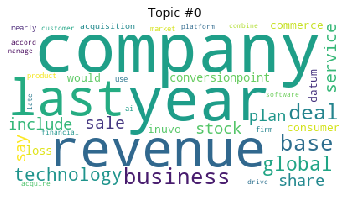

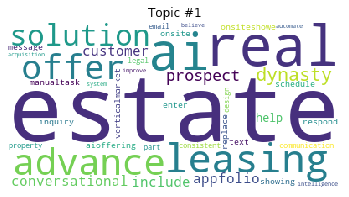

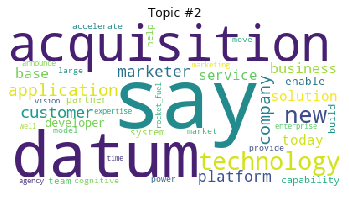

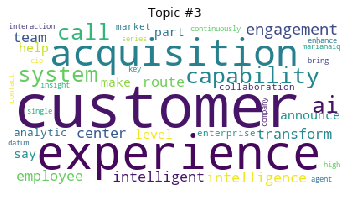

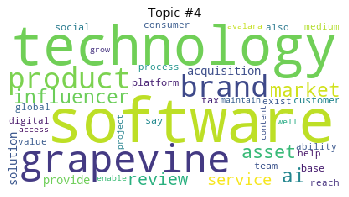

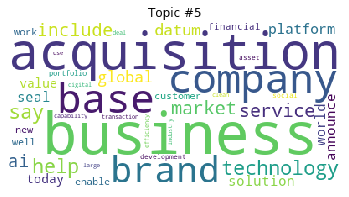

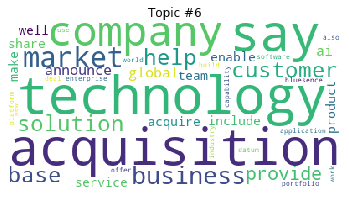

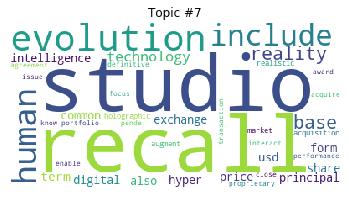

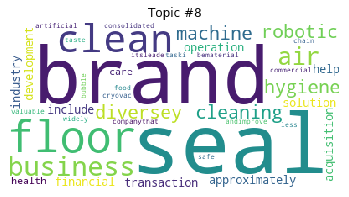

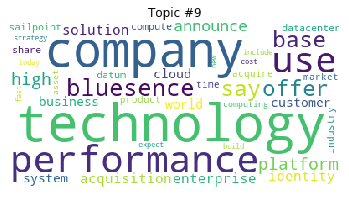

In [22]:
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud
for t in range(lda_model.num_topics):
    plt.figure()
    #plt.imshow(WordCloud().fit_words(lda_model.show_topic(t, 200)))
    plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model.show_topic(t, 40))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig("Topic#"+str(t), format='pdf')
    plt.show()

In [17]:
Topic_0 = []
Topic_1 = []
Topic_2 = []
Topic_3 = []
Topic_4 = []
Topic_5 = []
Topic_6 = []
Topic_7 = []
Topic_8 = []
Topic_9 = []
Doc_No = []
data_lemmatized_word = []
for i, row in enumerate(lda_model[corpus]):
    #row = sorted(row, key=lambda x:x[1], reverse=True)
    Topic_0.append(0);
    Topic_1.append(0);
    Topic_2.append(0);
    Topic_3.append(0);
    Topic_4.append(0);
    Topic_5.append(0);
    Topic_6.append(0);
    Topic_7.append(0);
    Topic_8.append(0);
    Topic_9.append(0);
    Doc_No.append(i);
    data_lemmatized_word.append(data_lemmatized[i])
    for k in range(len(row)):
        if(row[k][0]==0):
            Topic_0[i]=row[k][1];
        if(row[k][0]==1):
            Topic_1[i]=row[k][1];
        if(row[k][0]==2):
            Topic_2[i]=row[k][1];
        if(row[k][0]==3):
            Topic_3[i]=row[k][1];
        if(row[k][0]==4):
            Topic_4[i]=row[k][1];
        if(row[k][0]==5):
            Topic_5[i]=row[k][1];
        if(row[k][0]==6):
            Topic_6[i]=row[k][1];
        if(row[k][0]==7):
            Topic_7[i]=row[k][1];
        if(row[k][0]==8):
            Topic_8[i]=row[k][1];
        if(row[k][0]==9):
            Topic_9[i]=row[k][1];   
df = pd.DataFrame(list(zip(Doc_No, Topic_0, Topic_1, Topic_2, Topic_3, Topic_4, Topic_5, Topic_6, Topic_7, Topic_8, Topic_9,data_lemmatized_word)), 
               columns = ['Doc_No', 'Topic#0', 'Topic#1', 'Topic#2', 'Topic#3', 'Topic#4', 'Topic#5', 'Topic#6', 'Topic#7', 'Topic#8', 'Topic#9','Text'])
df.to_csv('Topic_Score_for_each_Document.csv')

In [18]:
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric

lda_topics = lda_model.show_topics(num_words=30)

topics = []
filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]

for topic in lda_topics:
    print(topic)
    topics.append(preprocess_string(topic[1], filters))

print(topics)

(0, '0.012*"company" + 0.009*"year" + 0.007*"revenue" + 0.006*"last" + 0.006*"business" + 0.006*"base" + 0.005*"deal" + 0.004*"global" + 0.004*"technology" + 0.004*"sale" + 0.004*"service" + 0.004*"include" + 0.004*"say" + 0.004*"plan" + 0.004*"share" + 0.004*"stock" + 0.004*"conversionpoint" + 0.004*"loss" + 0.003*"datum" + 0.003*"would" + 0.003*"consumer" + 0.003*"inuvo" + 0.003*"commerce" + 0.003*"acquisition" + 0.003*"market" + 0.003*"product" + 0.003*"firm" + 0.003*"ai" + 0.003*"use" + 0.003*"nearly"')
(1, '0.003*"estate" + 0.003*"real" + 0.003*"ai" + 0.003*"leasing" + 0.002*"advance" + 0.002*"offer" + 0.002*"solution" + 0.002*"dynasty" + 0.002*"prospect" + 0.002*"appfolio" + 0.002*"conversational" + 0.002*"customer" + 0.002*"include" + 0.001*"help" + 0.001*"aioffering" + 0.001*"onsiteshowe" + 0.001*"onsite" + 0.001*"showing" + 0.001*"enter" + 0.001*"manualtask" + 0.001*"inquiry" + 0.001*"verticalmarket" + 0.001*"replace" + 0.001*"respond" + 0.001*"message" + 0.001*"schedule" + 0.

In [19]:
Topic0 = topics[0]
Topic1 = topics[1]
Topic2 = topics[2]
Topic3 = topics[3]
Topic4 = topics[4]
Topic5 = topics[5]
Topic6 = topics[6]
Topic7 = topics[7]
Topic8 = topics[8]
Topic9 = topics[9]
df = pd.DataFrame(list(zip(Topic0, Topic1, Topic2, Topic3, Topic4, Topic5, Topic6, Topic7, Topic8, Topic9)), 
               columns = ['Topic#0', 'Topic#1', 'Topic#2', 'Topic#3', 'Topic#4', 'Topic#5', 'Topic#6', 'Topic#7', 'Topic#8', 'Topic#9'])
df.to_csv('Topic_Keywords.csv')      